# Book Recommendation System

## Read the dataset 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
books = pd.read_csv('BX-Books.csv', sep=";",error_bad_lines= False, encoding="latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books=books[['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher']]
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [5]:
books.rename(columns={'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'},inplace=True)

In [6]:
books.head(2)

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [7]:
users = pd.read_csv('BX-Users.csv', sep=";",error_bad_lines= False, encoding="latin-1")
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [8]:
users.rename(columns={'User-ID':'user-id','Location':'location','Age':'age'},inplace=True)
users.head(2)

,user-id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [9]:
ratings= pd.read_csv('BX-Book-Ratings.csv',sep=";",error_bad_lines=False,encoding="latin-1")
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [10]:
ratings.rename(columns={'User-ID':'user_id','ISBN':'ISBN','Book-Rating':'rating'},inplace=True)
ratings.head(2)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5


In [11]:
books.shape

(271360, 5)

In [12]:
users.shape

(278858, 3)

In [13]:
ratings.shape

(1149780, 3)

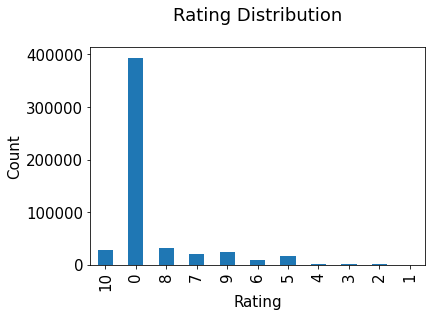

In [141]:
plt.rc("font", size=15)
ratings.rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Data Cleaning

In [14]:
# find the unique values
ratings['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [15]:
# consider those users who give minimum 200 ratings to the books
x = ratings['user_id'].value_counts()>200
x

11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
116180    False
116166    False
116154    False
116137    False
276723    False
Name: user_id, Length: 105283, dtype: bool

In [16]:
# remove those user_id whose value is false
x[x]

11676     True
198711    True
153662    True
98391     True
35859     True
          ... 
274808    True
28634     True
59727     True
268622    True
188951    True
Name: user_id, Length: 899, dtype: bool

In [17]:
x[x].shape

(899,)

In [18]:
# extracted the values
y=x[x].index
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [19]:
# consider those values who is in y
# return those rows whose user_id is in y
ratings=ratings[ratings['user_id'].isin(y)]
ratings.shape

(526356, 3)

In [20]:
ratings.head(4)

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0


In [21]:
# join ratings and books dataset on the basis of ISBN
ratings_with_books=ratings.merge(books,on='ISBN')
ratings_with_books.shape

(487671, 7)

In [22]:
ratings_with_books

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
...,...,...,...,...,...,...,...
487666,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom
487667,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA)
487668,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim"
487669,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann


In [23]:
ratings_with_books.groupby('title')['rating'].count()

title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    2
 Always Have Popsicles                                                                                        1
 Apple Magic (The Collector's series)                                                                         1
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   1
 Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                                1
                                                                                                             ..
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.                                                           3
Ã?Â?lpiraten.                                                                                                 1
Ã?Â?rger mit Produkt X. Roman.                                                                    

In [24]:
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()
number_rating

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160264,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160265,Ã?Â?lpiraten.,1
160266,Ã?Â?rger mit Produkt X. Roman.,1
160267,Ã?Â?stlich der Berge.,1


In [25]:
number_rating.rename(columns={'rating':'number of ratings'},inplace=True)
number_rating.head(2)

,title,number of ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1


In [26]:
# join with ratings_with_books
final_rating= ratings_with_books.merge(number_rating,on='title')
final_rating.head(5)

,user_id,ISBN,rating,title,author,year,publisher,number of ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82


In [27]:
# consider those books which have minimun 50 rating
final_rating=final_rating[final_rating['number of ratings']>=50]

In [28]:
final_rating.shape

(61853, 8)

In [29]:
# remove duplicates values
final_rating.drop_duplicates(['user_id','title'],inplace=True)
final_rating.shape

(59850, 8)

In [30]:
book_pivot=final_rating.pivot_table(columns='user_id',index='title',values='rating')
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [31]:
book_pivot.fillna(0,inplace=True)

In [32]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
book_pivot.shape

(742, 888)

## Training the model

In [33]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [146]:
type(book_sparse)

scipy.sparse.csr.csr_matrix

In [147]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm = 'brute')

In [41]:
# Train the data
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [133]:
distances , suggestions = model.kneighbors(book_pivot.iloc[45, :].values.reshape(1,-1),n_neighbors = 6)

In [134]:
distances

array([[ 0.        , 40.27406113, 40.42276586, 41.94043395, 42.07136794,
        42.29657197]])

In [135]:
suggestions

array([[ 45, 536, 184, 589, 185, 686]], dtype=int64)

In [136]:
for i in range(len(suggestions)):
    print(book_pivot.index[suggestions[i]])

Index(['Along Came a Spider (Alex Cross Novels)', 'The Cradle Will Fall',
       'Exclusive', 'The Killing Game: Only One Can Win...and the Loser Dies',
       'Executive Orders (Jack Ryan Novels)',
       'Tom Clancy's Op-Center (Tom Clancy's Op Center (Paperback))'],
      dtype='object', name='title')


In [123]:
def recommend_book(book_name):
    
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distances , suggestions = model.kneighbors(book_pivot.iloc[book_id, :].values.reshape(1,-1),n_neighbors = 6)
    for i in range(len(suggestions)):
        if i == 0:
            print("The suggestions for",book_name,"are :")
        if not i:
            print(book_pivot.index[suggestions[i]])

In [137]:
recommend_book('Along Came a Spider (Alex Cross Novels)')

The suggestions for Along Came a Spider (Alex Cross Novels) are :
Index(['Along Came a Spider (Alex Cross Novels)', 'The Cradle Will Fall',
       'Exclusive', 'The Killing Game: Only One Can Win...and the Loser Dies',
       'Executive Orders (Jack Ryan Novels)',
       'Tom Clancy's Op-Center (Tom Clancy's Op Center (Paperback))'],
      dtype='object', name='title')
